In [44]:
"""LCR meter only"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter
ser_cn740 = DeviceConnect_CN740('/dev/cu.usbserial-BG00XWYD')  # Omega CN740 (RS-485)

freq = Frequencies(1*1000, 100*1000, 50) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 5 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
timestamp = time.strftime("%H%M")
set_temp = 90 # SV in degC

try:
    material = input('Material? ')
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment_b1(ser_lcr, freq, voltage, biasVoltage, numMeasurements, ser_cn740,set_temp)
    DataExport_b(material, dataFrame, info, timestamp)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport_b(material, dataFrame, info, timestamp)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)
    DeviceDisconnect(ser_cn740)
    
end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

    Frequency    PV    SV       Z Avg.        Z Std.  THR Avg.  THR Std.
0        1000  24.5  90.0  101027220.0  1.135211e+06 -89.02632  0.407711
1        1099  24.5  90.0   93338320.0  4.467197e+06 -89.17852  0.730747
2        1207  24.5  90.0   82959600.0  3.756747e+06 -89.13266  0.626335
3        1326  24.5  90.0   73754860.0  2.839137e+06 -89.25344  0.487637
4        1456  24.5  90.0   67053500.0  2.338589e+06 -89.14534  0.614672
5        1600  24.5  90.0   60896580.0  2.243168e+06 -88.97200  0.666466
6        1758  24.5  90.0   56511480.0  1.922969e+06 -88.95256  0.533616
7        1931  24.5  90.0   52685460.0  1.007711e+06 -89.29456  0.233567
8        2121  24.5  90.0   48293340.0  1.506620e+06 -89.23252  0.180891
9        2330  24.5  90.0   43360780.0  2.171436e+06 -88.97512  0.163747
10       2560  24.5  90.0   38517060.0  1.561600e+06 -89.11412  0.262014
11       2812  24.5  90.0   34611320.0  1.838500e+06 -89.23530  0.567105
12       3089  24.5  90.0   31706600.0  1.406603e+0

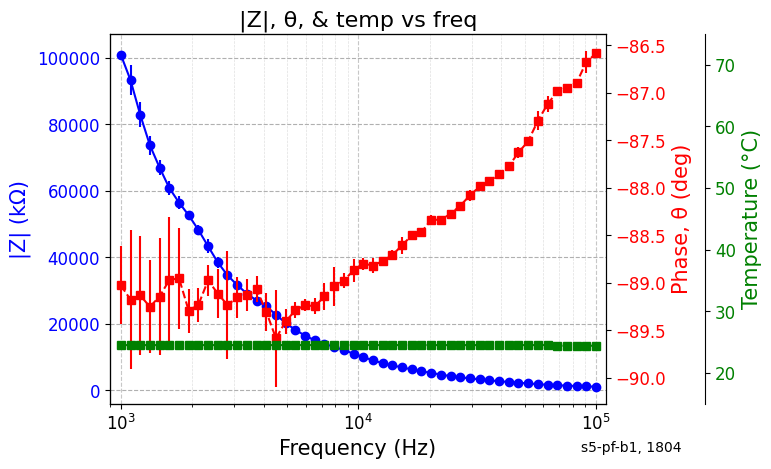

In [45]:
fig, ax1 = plt.subplots()
import matplotlib.pyplot as plt

# Left Y-axis: |Z|
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['Z Avg.'] / 1000, yerr=dataFrame['Z Std.'] / 1000,
    fmt='o-', color='blue', label='|Z|')
ax1.set_xlabel('Frequency (Hz)', fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue', fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(freq[0]*0.9, freq[-1]*1.1)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)

ax1.grid(which='major', axis='x', linestyle='--', linewidth=0.8, alpha=0.7)
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.5, alpha=0.4)


# Right Y-axis #1: Phase θ
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['THR Avg.'], yerr=dataFrame['THR Std.'],
    fmt='s--', color='red', label='Phase θ')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
#ax2.set_ylim(-90,-88)

# Right Y-axis #2 (offset): Temperature
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  # Move this y-axis to the right
ax3.plot(
    dataFrame['Frequency'], dataFrame['PV'],
    marker='s', linestyle='--', color='green', label='Temperature')
ax3.set_ylabel('Temperature (°C)', color='green', fontsize=15)
ax3.tick_params(axis='y', labelcolor='green', labelsize=12)
ax3.set_ylim(15,75)

# Add grid and title
ax1.grid(True, which='both', ls='--')
plt.title('|Z|, θ, & temp vs freq', fontsize=16)

plt.show()